In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import pickle

In [2]:
with open('datastore.pkl', 'rb') as file:
  datastore = pickle.load(file)

In [3]:
headlines = []
labels = []

for item in datastore:
  headlines.append(item['headline'])
  labels.append(item['keyword'])

In [7]:
vocab_size = 31714
max_length = 200
trunc_type = "post"
padding = "post"
embedding_dim = 100
training_size = 45000
oov_tok = "<OOV>"

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(headlines)

headlines_sequences = tokenizer.texts_to_sequences(headlines)
padded_headlines = pad_sequences(headlines_sequences, maxlen=max_length, truncating=trunc_type, padding=padding)

In [9]:
labels = to_categorical(labels, num_classes=3)

In [10]:
from sklearn.model_selection import train_test_split

padded_training, padded_testing, training_labels, testing_labels = train_test_split(padded_headlines, labels, test_size=0.20)


In [ ]:
training_labels[0]

array([0., 0., 1.], dtype=float32)

In [11]:
word_index = tokenizer.word_index

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          3171400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2000100   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 5,171,803
Trainable params: 5,171,803
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
num_epochs = 5
history = model.fit(
    padded_training,
    training_labels,
    epochs=num_epochs,
    validation_data=(padded_testing, testing_labels),
    batch_size=128
)

Epoch 1/5
375/375 [==============================] - 15s 35ms/step - loss: 0.2341 - accuracy: 0.8515 - val_loss: 0.1045 - val_accuracy: 0.9461
Epoch 2/5
375/375 [==============================] - 12s 33ms/step - loss: 0.0667 - accuracy: 0.9668 - val_loss: 0.0996 - val_accuracy: 0.9491
Epoch 3/5
375/375 [==============================] - 12s 32ms/step - loss: 0.0323 - accuracy: 0.9863 - val_loss: 0.1118 - val_accuracy: 0.9444
Epoch 4/5
375/375 [==============================] - 12s 33ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.1267 - val_accuracy: 0.9426
Epoch 5/5
375/375 [==============================] - 13s 34ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.1446 - val_accuracy: 0.9408


In [18]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string.capitalize())
  plt.legend([string, 'val_'+string])
  plt.show()

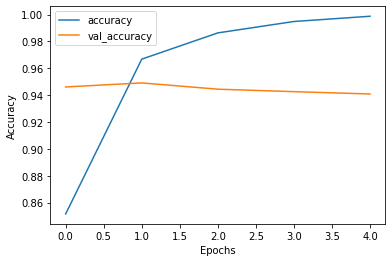

In [19]:
plot_graph(history, "accuracy")

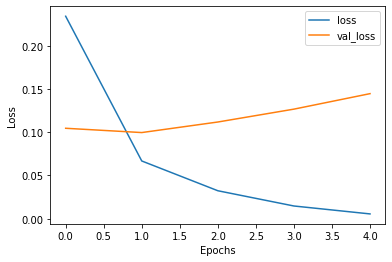

In [20]:
plot_graph(history, "loss")

In [ ]:
labels = [
    "business",
    "gaming",
    "tech"
]

In [ ]:
sentence = "Google fined €500m by French competition authority"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)

In [ ]:
sentence = "Stocks making the biggest moves premarket: PepsiCo, JPMorgan, Boeing and others"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)

In [ ]:
sentence = "Battlegrounds Mobile India: 10 things that can get you permanently banned or make you lose all pervious possessions"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)